**Model Training**

1. Import Data and Required Packages

In [1]:
# Basic Import

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling 
from sklearnex import patch_sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
os.environ["LOKY_MAX_CPU_COUNT"] = "6"
patch_sklearn() 

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
csv_path = "data/creditcard.csv"
credit_df = pd.read_csv(csv_path)
print(credit_df.head())
print(credit_df.shape)

Preparing X and y variables


In [ ]:
X = credit_df.drop(columns='Class', axis=1).values

y = credit_df['Class'].values

In [ ]:
# Standarized the data 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# seperate the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = {
    "K_Neighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "XGBoost Classifier": XGBClassifier(scale_pos_weight=10),
    "GradientBoosting Classifier": GradientBoostingClassifier()
}

In [ ]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for name, model in model.items():
    model.fit(X_train, y_train) 
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    model_list.append(name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    
    print(f"🔹{name} Performance:")
    print(f"- Accuracy: {accuracy:.4f}")
    print(f"- Precision: {precision:.4f}")
    print(f"- Recall: {recall:.4f}")
    print(f"- F1 Score: {f1:.4f}")
    print("-" * 40)
    
results_df = pd.DataFrame({
    "Model": model_list,
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1 Score": f1_list
})  


results_df = results_df.sort_values(by="F1 Score", ascending=False)
print("\n🔹 Model Performance Summary:\n")
print(results_df)

🔹K_Neighbors Classifier Performance:
- Accuracy: 0.9995
- Precision: 0.9186
- Recall: 0.8061
- F1 Score: 0.8587
----------------------------------------
🔹Decision Tree Performance:
- Accuracy: 0.9990
- Precision: 0.7100
- Recall: 0.7245
- F1 Score: 0.7172
----------------------------------------
🔹Random Forest Classifier Performance:
- Accuracy: 0.9773
- Precision: 0.0655
- Recall: 0.9184
- F1 Score: 0.1223
----------------------------------------
🔹XGBoost Classifier Performance:
- Accuracy: 0.9995
- Precision: 0.8977
- Recall: 0.8061
- F1 Score: 0.8495
----------------------------------------


K-Nearest Neighbours Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Model is {accuracy}")

Accuracy of Model is 0.9995435553526912


Confusion Matrix

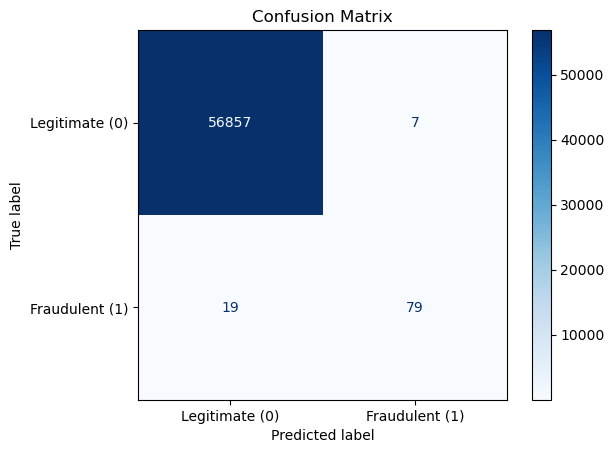

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate (0)", "Fraudulent (1)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

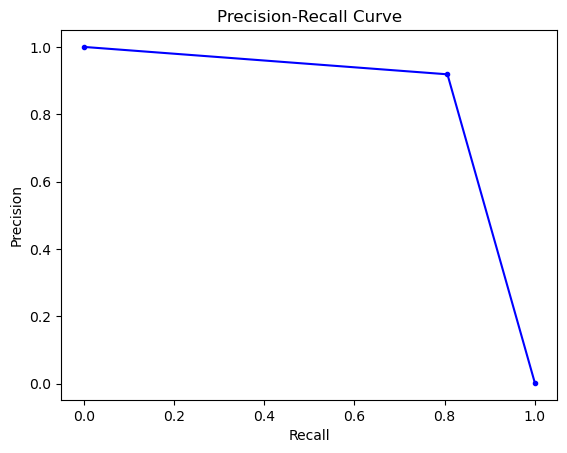

In [ ]:

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, marker='.', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()